In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np
# import statsmodels.tsa.api as tsa

import datetime as dt
pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [2]:
## How to make a markdown table from a csv
df = pd.read_csv('Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00","255,517.00",...,"741,586.00","745,686.00","750,578.00","756,734.00","762,321.00","768,797.00","773,944.00","777,692.00","779,960.00","781,622.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"234,181.00","234,401.00",...,"924,019.00","928,991.00","937,936.00","953,874.00","973,168.00","990,391.00","992,337.00","992,630.00","978,196.00","966,595.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,068.00","109,079.00",...,"245,783.00","248,718.00","252,080.00","256,435.00","261,101.00","265,558.00","268,901.00","271,059.00","272,400.00","272,639.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"166,139.00","166,536.00",...,"302,821.00","305,104.00","306,404.00","308,303.00","309,649.00","312,487.00","314,663.00","315,910.00","315,587.00","315,429.00"
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,"114,794.00","114,975.00",...,"269,323.00","274,032.00","278,464.00","284,127.00","289,739.00","294,776.00","297,727.00","298,796.00","299,124.00","298,951.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,"198,490.00","198,467.00","196,420.00","192,002.00","191,634.00","189,383.00","191,134.00","191,343.00","192,384.00","192,110.00"
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,"229,251.00","232,984.00","238,245.00","240,154.00","242,470.00","243,119.00","249,098.00","255,572.00","261,910.00","264,685.00"
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,"53,380.00","53,662.00",...,"132,490.00","134,951.00","137,470.00","137,430.00","137,413.00","137,615.00","138,908.00","140,096.00","141,573.00","142,438.00"
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"258,191.00","261,607.00","264,571.00","266,255.00"


In [3]:
df = df[df['SizeRank'].isin([0,1,2,3])]
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00","255,517.00",...,"741,586.00","745,686.00","750,578.00","756,734.00","762,321.00","768,797.00","773,944.00","777,692.00","779,960.00","781,622.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"234,181.00","234,401.00",...,"924,019.00","928,991.00","937,936.00","953,874.00","973,168.00","990,391.00","992,337.00","992,630.00","978,196.00","966,595.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,068.00","109,079.00",...,"245,783.00","248,718.00","252,080.00","256,435.00","261,101.00","265,558.00","268,901.00","271,059.00","272,400.00","272,639.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"166,139.00","166,536.00",...,"302,821.00","305,104.00","306,404.00","308,303.00","309,649.00","312,487.00","314,663.00","315,910.00","315,587.00","315,429.00"


In [4]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [5]:
## First 3 columns are id coluimns
id_vars = df.columns[:8]
id_vars

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],
      dtype='object')

In [6]:
## Melt the crypto data 
long_df = pd.melt(df, id_vars=id_vars)
long_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,variable,value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"253,690.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,"234,181.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,"109,068.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,"166,139.00"
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,"255,517.00"
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,"315,587.00"
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,"781,622.00"
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,"966,595.00"
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,"272,639.00"


In [7]:
## Set the var_name  as "Date" and the value_name was "Currency Value"
long_df = pd.melt(df,id_vars=id_vars, var_name='Date', 
                      value_name="Value")
long_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"253,690.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,"234,181.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,"109,068.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,"166,139.00"
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,"255,517.00"
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,"315,587.00"
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,"781,622.00"
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,"966,595.00"
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,"272,639.00"


In [8]:
## Now make Date column datetime 
long_df['Date'] = pd.to_datetime( long_df["Date"])
long_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"253,690.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,"234,181.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,"109,068.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,"166,139.00"
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,"255,517.00"
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,"315,587.00"
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,"781,622.00"
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,"966,595.00"
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,"272,639.00"


In [9]:
## Set Date as index
long_df = long_df.set_index('Date')
long_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00"
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"234,181.00"
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,068.00"
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"166,139.00"
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"255,517.00"
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"315,587.00"
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"781,622.00"
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"966,595.00"


In [10]:
ts = long_df.copy()
ts

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00"
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"234,181.00"
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,068.00"
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"166,139.00"
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"255,517.00"
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"315,587.00"
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"781,622.00"
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"966,595.00"


In [11]:
ts.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-02-29', '2000-02-29', '2000-02-29', '2000-02-29',
               '2000-03-31', '2000-03-31',
               ...
               '2022-07-31', '2022-07-31', '2022-08-31', '2022-08-31',
               '2022-08-31', '2022-08-31', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

In [19]:
ts = long_df.groupby("RegionName").resample("M").asfreq("M")['Value']
ts

RegionName  Date      
Chicago     2000-01-31   166,139.00
            2000-02-29   166,536.00
            2000-03-31   167,368.00
            2000-04-30   168,826.00
            2000-05-31   170,499.00
                            ...    
New York    2022-05-31   768,797.00
            2022-06-30   773,944.00
            2022-07-31   777,692.00
            2022-08-31   779,960.00
            2022-09-30   781,622.00
Name: Value, Length: 1092, dtype: float64

In [20]:
ts.unstack(0)

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,"166,139.00","109,068.00","234,181.00","253,690.00"
2000-02-29,"166,536.00","109,079.00","234,401.00","255,517.00"
2000-03-31,"167,368.00","108,878.00","235,513.00","257,207.00"
2000-04-30,"168,826.00","108,881.00","237,589.00","260,310.00"
2000-05-31,"170,499.00","108,834.00","240,113.00","263,204.00"
...,...,...,...,...
2022-05-31,"312,487.00","265,558.00","990,391.00","768,797.00"
2022-06-30,"314,663.00","268,901.00","992,337.00","773,944.00"
2022-07-31,"315,910.00","271,059.00","992,630.00","777,692.00"


In [21]:
ts_unstacked = ts.unstack(0)
ts_unstacked

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,"166,139.00","109,068.00","234,181.00","253,690.00"
2000-02-29,"166,536.00","109,079.00","234,401.00","255,517.00"
2000-03-31,"167,368.00","108,878.00","235,513.00","257,207.00"
2000-04-30,"168,826.00","108,881.00","237,589.00","260,310.00"
2000-05-31,"170,499.00","108,834.00","240,113.00","263,204.00"
...,...,...,...,...
2022-05-31,"312,487.00","265,558.00","990,391.00","768,797.00"
2022-06-30,"314,663.00","268,901.00","992,337.00","773,944.00"
2022-07-31,"315,910.00","271,059.00","992,630.00","777,692.00"


In [23]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

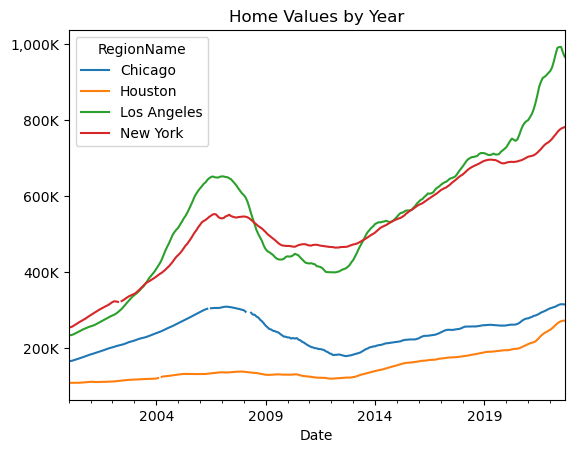

In [31]:
ax = ts_unstacked.plot(title='Home Values by Year');
ax.yaxis.set_major_formatter(fmt_thous)

In [34]:
home_2008 = ts_unstacked.loc['2008']
home_2008

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-01-31,"300,207.00","138,208.00","603,029.00","546,538.00"
2008-02-29,"296,063.00","137,512.00","596,635.00","546,098.00"
2008-03-31,NaN,"136,795.00","586,065.00","544,562.00"
2008-04-30,NaN,"136,628.00","571,226.00","541,865.00"
2008-05-31,"293,467.00","136,228.00","554,589.00","537,685.00"
2008-06-30,"288,495.00","135,773.00","539,622.00","533,810.00"
2008-07-31,"288,174.00","135,392.00","524,220.00","529,211.00"
2008-08-31,"283,199.00","134,770.00","510,520.00","525,290.00"
2008-09-30,"280,695.00","133,932.00","500,124.00","521,347.00"
